
🚀 Enhanced E-Commerce Product Price Analyzer and Predictor
------------------------------------------------------

💰 Enter your product details for pricing optimization:



Enter your product name:  earphone



📋 Available Product Categories:
   1. 🔹 Computers
   2. 🔹 Home Entertainment
   3. 🔹 Kitchen Appliances
   4. 🔹 Mobile Accessories
   5. 🔹 Audio
   6. 🔹 Smartwatches
   7. 🔹 Climate Control
   8. 🔹 Home Audio
   9. 🔹 Batteries & Chargers
   10. 🔹 Office Supplies
   11. 🔹 Memory Cards
   12. 🔹 Laundry & Storage
   13. 🔹 Crafting
   14. 🔹 Security Cameras
   15. 🔹 Video Cameras
   16. 🔹 Camera Tripods
   17. 🔹 Coloring & Art Supplies
   18. 🔹 Camera Flashes
   19. 🔹 Automotive



Enter category number (or type the category name):  5

Enter your manufacturing cost (in ₹):  500



📊 Select your product's quality tier:
   1. 💎 Premium (high-end materials, advanced features)
   2. ✓ Mid-range (good quality, standard features)
   3. 🔽 Budget (cost-effective, basic features)



Enter quality tier (1-3):  3



🔍 Searching for similar products to 'earphone' in category 'Audio'...
Attempting to fetch search results for 'earphone'...
Attempting request without proxy...
✅ Successfully retrieved search results.

✅ Found 23 similar products.

✅ Similar product data added to training dataset

🔍 Found 243 products in the 'Audio' category...
Removed 2 duplicate features

Training with 19 unique features: manufacturing_cost, rating, rating_count, price_to_cost_ratio, estimated_units_sold, brand_tier, category_complexity, price_segment, seasonal_relevance, is_new_release, value_ratio, price_elasticity, rating_x_count, discount_to_margin_ratio, premium_complexity, category_median_price, price_to_category_median_ratio, brand_avg_price, price_to_brand_avg_ratio

🔍 Training new models for 'Audio' with 19 features...

Training Discounted Price model...
Input data shape: (194, 19)
Converted training data to numpy arrays: (194, 19)
Fitting basic model...
✓ Basic model fit successful
Starting hyperparameter t

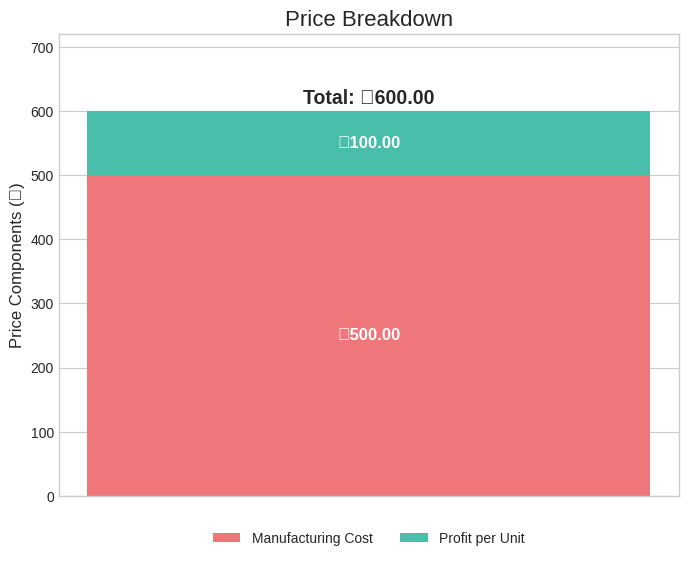

✅ Created price breakdown visualization


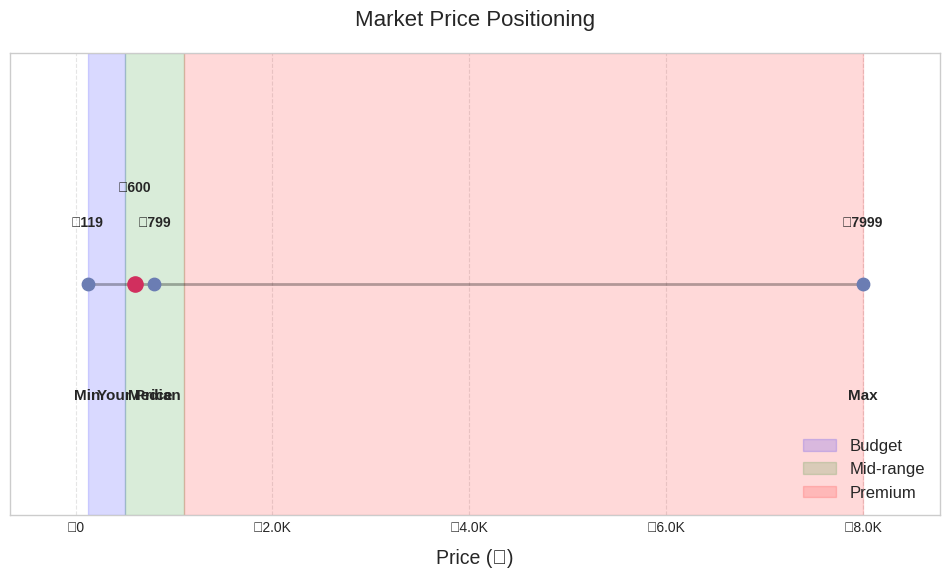

✅ Created improved market positioning visualization


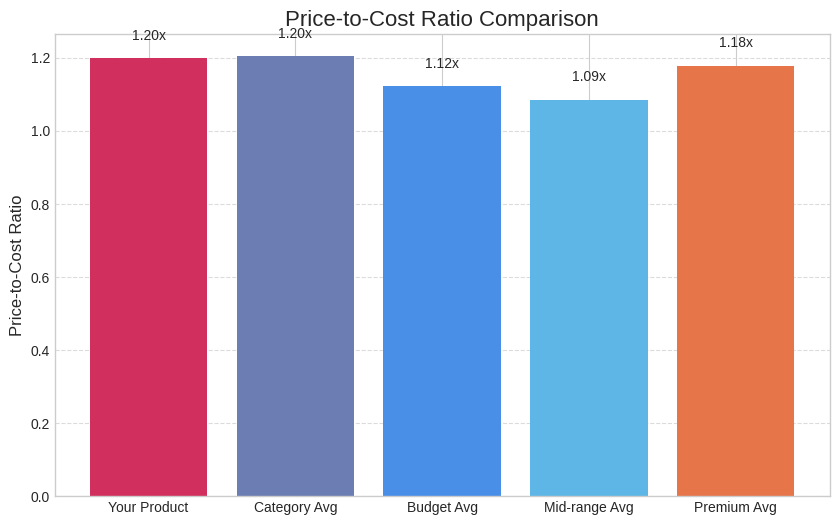

✅ Created price-to-cost ratio comparison


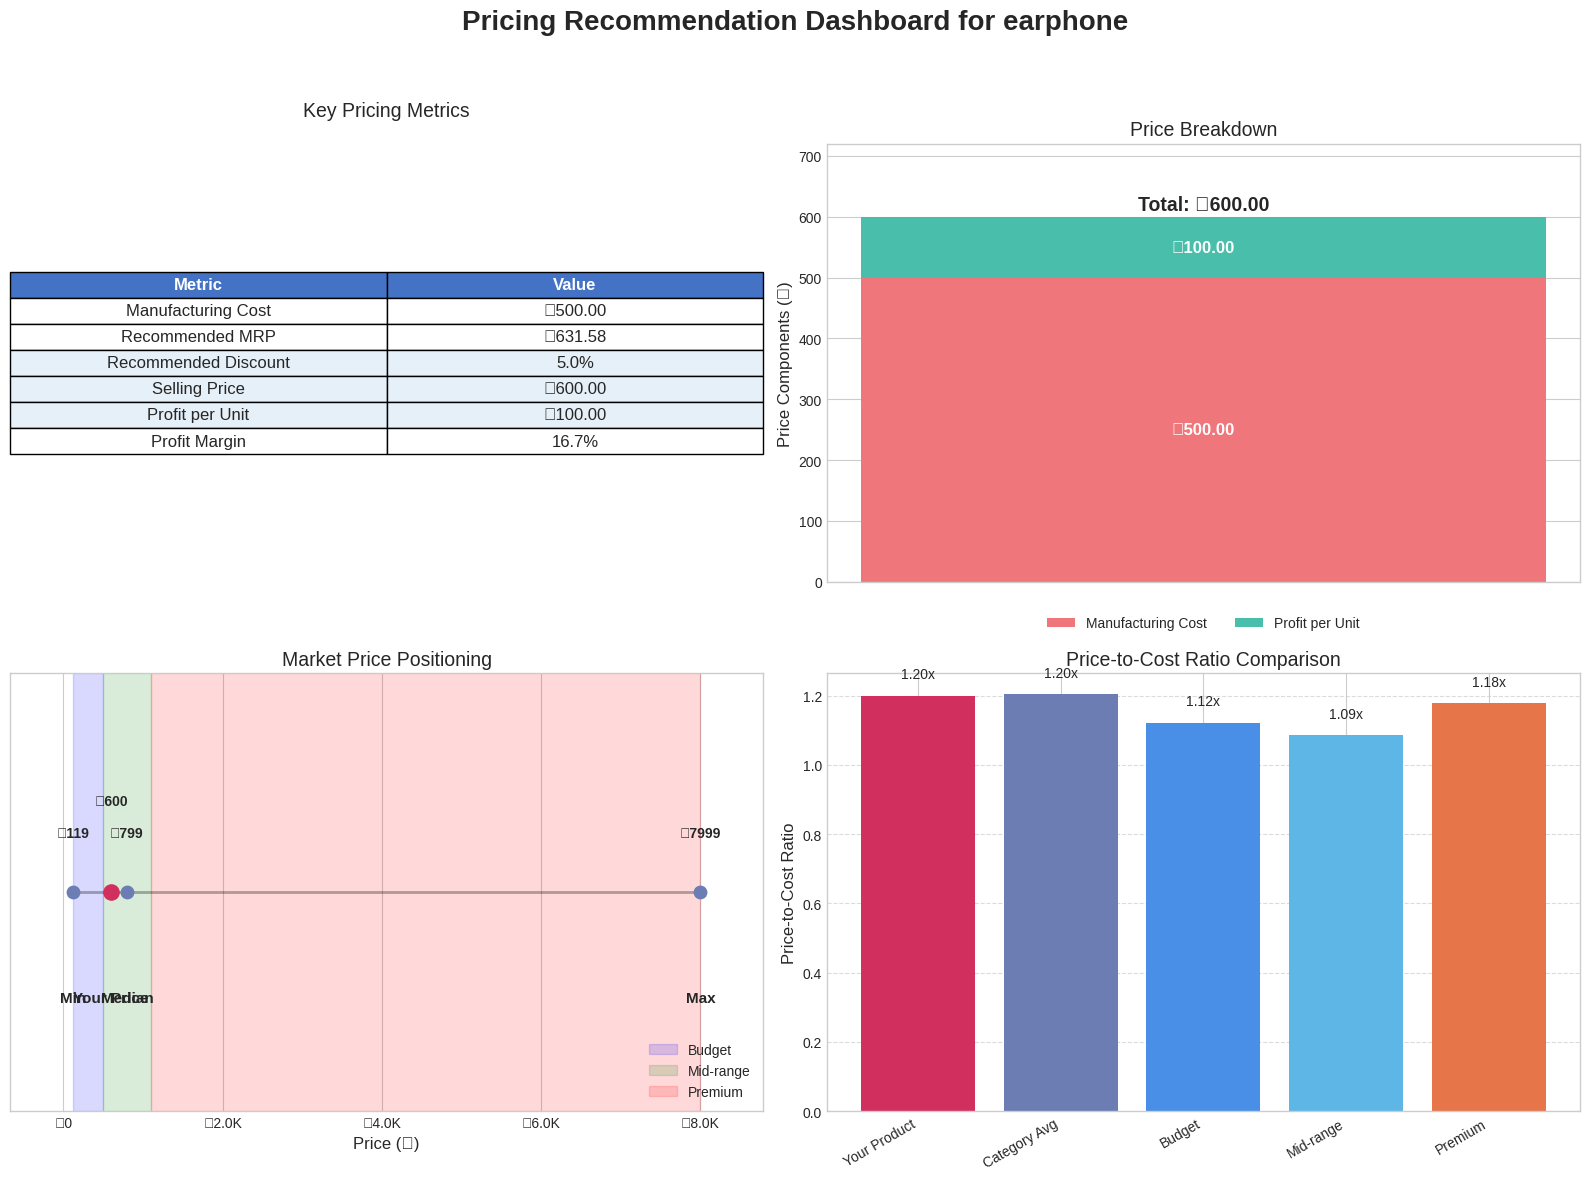

✅ Created comprehensive pricing dashboard

📊 All result visualizations saved to 'result_visualizations' folder

✅ Recommendation saved to pricing_recommendation_earphone.csv

✅ Visualizations created in 'result_visualizations' folder


In [1]:
import requests
import time
import random
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import math
import os
import joblib
import matplotlib.pyplot as plt
from datetime import datetime
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings('ignore')

# Available product categories
CATEGORIES = [
    "Computers",
    "Home Entertainment",
    "Kitchen Appliances",
    "Mobile Accessories",
    "Audio",
    "Smartwatches",
    "Climate Control",
    "Home Audio",
    "Batteries & Chargers",
    "Office Supplies",
    "Memory Cards",
    "Laundry & Storage",
    "Crafting",
    "Security Cameras",
    "Video Cameras",
    "Camera Tripods",
    "Coloring & Art Supplies",
    "Camera Flashes",
    "Automotive"
]

# Category-specific manufacturing cost adjustments
CATEGORY_COST_ADJUSTMENTS = {
    "Computers": (0.05, -0.1),           # Higher min, lower max
    "Mobile Accessories": (-0.1, -0.15),  # Lower costs overall
    "Audio": (0.0, -0.05),               # Slight adjustment
    "Smartwatches": (0.03, -0.08),       # Tech with good margins
    "Kitchen Appliances": (0.02, 0.05),  # Higher manufacturing costs
    "Home Entertainment": (0.04, -0.07), # Electronics margins
    "Office Supplies": (-0.15, -0.2),    # Low manufacturing cost
    "Batteries & Chargers": (-0.05, -0.1), # Low cost to make
    "Automotive": (0.08, 0.03),          # Higher costs
    # Default for other categories is (0, 0)
}

# Category complexity scores (1-10) - higher means more features/components
CATEGORY_COMPLEXITY = {
    "Computers": 9,
    "Mobile Accessories": 4,
    "Audio": 7, 
    "Smartwatches": 8,
    "Kitchen Appliances": 6,
    "Home Entertainment": 8,
    "Climate Control": 7,
    "Home Audio": 7,
    "Batteries & Chargers": 3,
    "Office Supplies": 2,
    "Memory Cards": 4,
    "Laundry & Storage": 3,
    "Crafting": 2,
    "Security Cameras": 7,
    "Video Cameras": 8,
    "Camera Tripods": 4,
    "Coloring & Art Supplies": 2,
    "Camera Flashes": 5,
    "Automotive": 7
}

# Add brand tiers (premium, mid-range, budget)
BRAND_TIERS = {
    "Apple": "premium",
    "Samsung": "premium",
    "Sony": "premium",
    "Bose": "premium",
    "LG": "mid-range",
    "Philips": "mid-range",
    "Lenovo": "mid-range",
    "HP": "mid-range",
    "Dell": "mid-range",
    "JBL": "mid-range",
    "Bosch": "premium",
    "Xiaomi": "budget",
    "Realme": "budget",
    "Boat": "budget",
    "Noise": "budget",
    "Generic": "budget"
}

# User-Agent Rotation to Avoid Blocks
USER_AGENTS = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:121.0) Gecko/20100101 Firefox/121.0",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.2 Safari/605.1.15"
]

# Proxy Setup
PROXIES = {
    "http": "Your Proxy Address",
    "https": "Your proxy address",
}

# Helper function to ensure numeric columns are properly converted
def ensure_numeric_columns(df, columns_to_convert):
    """
    Ensures specified columns in a dataframe are numeric.
    
    Args:
        df: Pandas DataFrame
        columns_to_convert: List of column names to convert to numeric
        
    Returns:
        DataFrame with converted columns
    """
    for col in columns_to_convert:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df

# Display categories and get selection
def select_category():
    print("\n📋 Available Product Categories:")
    for i, category in enumerate(CATEGORIES, 1):
        print(f"   {i}. 🔹 {category}")
    
    while True:
        try:
            choice = input("\nEnter category number (or type the category name): ")
            
            # Check if input is a number
            if choice.isdigit():
                index = int(choice) - 1
                if 0 <= index < len(CATEGORIES):
                    return CATEGORIES[index]
                else:
                    print("Invalid number. Please try again.")
            # Check if input matches a category name
            elif choice in CATEGORIES:
                return choice
            else:
                print("Category not found. Please try again.")
        except ValueError:
            print("Invalid input. Please enter a number or category name.")

# Function to get user input for manufacturing cost
def get_manufacturing_cost():
    while True:
        try:
            cost = float(input("\nEnter your manufacturing cost (in ₹): "))
            if cost <= 0:
                print("Manufacturing cost must be greater than zero.")
            else:
                return cost
        except ValueError:
            print("Invalid input. Please enter a number.")

# Function to get user input for product quality/tier
def get_product_quality():
    print("\n📊 Select your product's quality tier:")
    print("   1. 💎 Premium (high-end materials, advanced features)")
    print("   2. ✓ Mid-range (good quality, standard features)")
    print("   3. 🔽 Budget (cost-effective, basic features)")
    
    while True:
        try:
            choice = input("\nEnter quality tier (1-3): ")
            if choice == '1':
                return "premium", 2
            elif choice == '2':
                return "mid-range", 1
            elif choice == '3':
                return "budget", 0
            else:
                print("Invalid choice. Please enter 1, 2, or 3.")
        except ValueError:
            print("Invalid input. Please enter a number.")

# Get current season (1-4)
def get_current_season():
    month = datetime.now().month
    if month in [12, 1, 2]:
        return 1  # Winter
    elif month in [3, 4, 5]:
        return 2  # Spring
    elif month in [6, 7, 8]:
        return 3  # Summer
    else:
        return 4  # Fall

# Function to extract product brand from name
def extract_brand(product_name):
    common_brands = ["Apple", "Samsung", "Sony", "Bose", "LG", "Philips", "Lenovo", 
                     "HP", "Dell", "JBL", "Bosch", "Xiaomi", "Realme", "Boat", "Noise"]
    
    for brand in common_brands:
        if brand.lower() in product_name.lower():
            return brand
    
    # Extract first word as potential brand if no known brand found
    first_word = product_name.split()[0]
    if len(first_word) > 2 and first_word[0].isupper():
        return first_word
        
    return "Generic"

# Function to estimate manufacturing cost from market data
def estimate_scraped_manufacturing_cost(actual_price, discounted_price, category, rating, brand="Generic"):
    # Base range for manufacturing cost percentage
    base_min_cost_pct = 0.3
    base_max_cost_pct = 0.7
    
    # Apply category adjustment if available
    adjustment = CATEGORY_COST_ADJUSTMENTS.get(category, (0, 0))
    min_cost_pct = base_min_cost_pct + adjustment[0]
    max_cost_pct = base_max_cost_pct + adjustment[1]
    
    # Add market-based variability
    market_factor = random.uniform(0.85, 1.15)  # ±15% variation
    
    # Brand tier affects manufacturing cost
    brand_tier = BRAND_TIERS.get(brand, "budget")
    brand_multiplier = 1.2 if brand_tier == "premium" else 1.1 if brand_tier == "mid-range" else 1.0
    
    # Product quality factor based on rating - higher rated products might use better materials
    quality_factor = 1.0 + (rating - 3.0) * 0.05  # Each rating point above 3 adds 5%
    
    # Category complexity impact - more complex products have higher relative costs
    complexity = CATEGORY_COMPLEXITY.get(category, 5) / 10  # Normalize to 0-1 range
    complexity_impact = 1.0 + (complexity - 0.5) * 0.2  # ±10% effect
    
    # Calculate with added complexity
    base_cost = random.uniform(min_cost_pct, max_cost_pct) * actual_price
    estimated_cost = round(base_cost * market_factor * brand_multiplier * quality_factor * complexity_impact, 2)
    
    # Ensure manufacturing cost is not greater than discounted price
    return min(estimated_cost, discounted_price * 0.95)  # Keep it at most 95% of discounted price

# Function to estimate units sold
def estimate_units_sold(rating_count, rating, discounted_price, category, discount_percentage):
    estimated_units = 0  # Initialize with default value
    
    if pd.isna(rating_count) or rating_count == 0:
        estimated_units = random.randint(5, 50)  # Random base number for products with no ratings
    else:
        # Assume conversion rate varies by product category and quality
        base_conversion_rate = random.uniform(0.1, 0.2)
        
        # Adjust conversion rate based on product category
        category_multiplier = 1.0
        if category in ["Mobile Accessories", "Batteries & Chargers"]:
            category_multiplier = 1.3  # Higher volume categories
        elif category in ["Computers", "Home Entertainment"]:
            category_multiplier = 0.7  # Lower volume categories
            
        # Rating affects conversion rate - higher rated products may have more buyers leaving reviews
        rating_multiplier = 0.8 + (rating / 5) * 0.4  # 0.8-1.2 range based on rating
        
        # Price effect - cheaper products might sell more units
        price_factor = max(0.8, 1.5 - (discounted_price / 5000) * 0.5)  # Caps at 0.8 for very expensive items
        
        # Discount effect - higher discounts may drive more sales
        discount_factor = 1.0 + (discount_percentage / 100) * 0.5  # Up to 50% boost for high discounts
        
        # Calculate adjusted conversion rate
        adjusted_conversion_rate = base_conversion_rate * category_multiplier * rating_multiplier * price_factor * discount_factor
        
        # Calculate estimated units - ensure we don't divide by zero
        if adjusted_conversion_rate > 0:
            estimated_units = int(rating_count / adjusted_conversion_rate)
        else:
            estimated_units = random.randint(10, 100)  # Fallback if conversion rate calculation fails
    
    # Add some noise to make it more realistic
    noise_factor = random.uniform(0.85, 1.15)
    return int(max(1, estimated_units * noise_factor))  # Ensure at least 1 unit sold

# Function to fetch Amazon search results with improved reliability
def fetch_amazon_page(product_name):
    query = product_name.replace(" ", "+")
    url = f"https://www.amazon.in/s?k={query}"
    
    print(f"Attempting to fetch search results for '{product_name}'...")
    time.sleep(random.uniform(2, 5))  # Reduced delay
    
    # Create a session with retry capability
    session = requests.Session()
    retry = Retry(
        total=3,
        backoff_factor=0.5,
        status_forcelist=[500, 502, 503, 504],
        allowed_methods=["GET"]
    )
    adapter = HTTPAdapter(max_retries=retry)
    session.mount("http://", adapter)
    session.mount("https://", adapter)
    
    headers = {
        "User-Agent": random.choice(USER_AGENTS),
        "Accept-Language": "en-US,en;q=0.9",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
        "Accept-Encoding": "gzip, deflate, br",
        "Referer": "https://www.amazon.in/",
        "DNT": "1",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Cache-Control": "max-age=0"
    }
    
    try:
        # Try without proxy first
        try:
            print("Attempting request without proxy...")
            response = session.get(url, headers=headers, timeout=10)
            response.raise_for_status()
        except requests.exceptions.RequestException:
            # If that fails, try with proxy
            print("Retrying with proxy...")
            response = session.get(url, headers=headers, proxies=PROXIES, timeout=15)
            response.raise_for_status()
        
        # Save the response content
        with open("amazon_search_results.html", "w", encoding="utf-8") as file:
            file.write(response.text)
        
        # Verify we got actual search results, not a captcha page
        if "captcha" in response.text.lower() or "robot check" in response.text.lower():
            print("⚠️ Amazon returned a CAPTCHA page. Need manual intervention.")
            return None
        
        if "did not match any products" in response.text:
            print(f"⚠️ No products found for '{product_name}'. Try a different search term.")
            return None
            
        print("✅ Successfully retrieved search results.")
        return "amazon_search_results.html"
    
    except requests.exceptions.RequestException as e:
        print(f"❌ Failed to retrieve page: {e}")
        
        # For testing/debugging: generate mock data
        print("\n⚠️ Using fallback mode with mock data for testing...")
        # Create a simple mock HTML file for testing
        with open("amazon_search_results.html", "w", encoding="utf-8") as file:
            file.write("""
            <html>
            <body>
                <div class="s-result-item" data-asin="B07Y8YWTFL">
                    <h2 class="a-size-medium a-spacing-none a-color-base a-text-normal"><span>Fast Charging Cable for Android Smartphone</span></h2>
                    <span class="a-price"><span class="a-offscreen">₹599</span></span>
                    <span class="a-icon-alt">4.3 out of 5 stars</span>
                    <span class="a-size-base s-underline-text">1,245</span>
                    <span>42% off</span>
                </div>
                <div class="s-result-item" data-asin="B07Y8YWTF2">
                    <h2 class="a-size-medium a-spacing-none a-color-base a-text-normal"><span>20W Fast Charger for Mobile Phone</span></h2>
                    <span class="a-price"><span class="a-offscreen">₹899</span></span>
                    <span class="a-icon-alt">4.5 out of 5 stars</span>
                    <span class="a-size-base s-underline-text">2,567</span>
                    <span>30% off</span>
                </div>
                <div class="s-result-item" data-asin="B07Y8YWTF3">
                    <h2 class="a-size-medium a-spacing-none a-color-base a-text-normal"><span>Budget USB Charger with 1.5M Cable</span></h2>
                    <span class="a-price"><span class="a-offscreen">₹499</span></span>
                    <span class="a-icon-alt">3.8 out of 5 stars</span>
                    <span class="a-size-base s-underline-text">856</span>
                    <span>25% off</span>
                </div>
            </body>
            </html>
            """)
        return "amazon_search_results.html"

# Function to extract product details
def extract_product_details(html_file, category, user_manufacturing_cost=None):
    with open(html_file, "r", encoding="utf-8") as file:
        soup = BeautifulSoup(file, "html.parser")
    
    products = []
    current_season = get_current_season()
    
    for item in soup.select("div.s-result-item[data-asin]"):
        name = item.select_one("h2.a-size-medium.a-spacing-none.a-color-base.a-text-normal span")
        price = item.select_one("span.a-price span.a-offscreen")
        discount_text = None
        
        # Extract rating
        rating_elem = item.select_one("span.a-icon-alt")
        rating = None
        if rating_elem:
            rating_match = re.search(r"(\d+(\.\d+)?)", rating_elem.text)
            if rating_match:
                rating = float(rating_match.group(1))
        
        # Extract rating count
        rating_count_elem = item.select_one("span.a-size-base.s-underline-text")
        rating_count = 0
        if rating_count_elem:
            count_text = rating_count_elem.text.replace(",", "")
            count_match = re.search(r"(\d+)", count_text)
            if count_match:
                rating_count = int(count_match.group(1))
        
        # Extract discount percentage dynamically
        for span in item.find_all("span"):
            match = re.search(r"(\d+)%", span.text)
            if match:
                discount_text = match.group(1)
                break  # Stop searching after finding the first discount
        
        if name and price:
            try:
                # Make sure we convert the price string to a float here
                price_text = price.text.replace("₹", "").replace(",", "").strip()
                discounted_price = float(price_text)
                
                # If discount information is available
                if discount_text:
                    discount_percentage = int(discount_text)
                    # Calculate actual price (MRP)
                    actual_price = round((discounted_price * 100) / (100 - discount_percentage), 2)
                else:
                    # Assume a random discount if not explicitly mentioned
                    discount_percentage = random.randint(5, 25)
                    actual_price = round(discounted_price / (1 - discount_percentage/100), 2)
                
                # Extract brand from product name
                brand = extract_brand(name.text.strip())
                
                # Default rating if not found
                if not rating:
                    rating = random.uniform(3.0, 4.5)
                
                # For scraped products, estimate manufacturing cost using market data
                # This is just for training data, not for the user's product
                if user_manufacturing_cost is None:
                    # Use the function to estimate manufacturing cost for scraped products
                    manufacturing_cost = estimate_scraped_manufacturing_cost(
                        actual_price, 
                        discounted_price, 
                        category, 
                        rating, 
                        brand
                    )
                else:
                    # For the user's own product, we'll use their provided manufacturing cost
                    # This block won't be executed here, but will be used later
                    manufacturing_cost = user_manufacturing_cost
                
                # Calculate price to cost ratio
                price_to_cost_ratio = round(discounted_price / manufacturing_cost, 2)
                
                # Estimate units sold
                estimated_units = estimate_units_sold(
                    rating_count, 
                    rating, 
                    discounted_price, 
                    category, 
                    discount_percentage
                )
                
                # Derive brand tier value (0=budget, 1=mid, 2=premium)
                brand_tier_value = 0
                if brand in BRAND_TIERS:
                    if BRAND_TIERS[brand] == "premium":
                        brand_tier_value = 2
                    elif BRAND_TIERS[brand] == "mid-range":
                        brand_tier_value = 1
                
                # Category complexity value (normalized)
                category_complexity = CATEGORY_COMPLEXITY.get(category, 5) / 10
                
                # Determine if the price point is budget, mid, or premium for its category
                # We'll compare it to the median price in the same category
                price_segment = 1  # Default to mid-range
                
                # Derive seasonality effects (if any)
                seasonal_relevance = 0.5  # Neutral by default
                
                # Some categories have seasonal patterns
                seasonal_categories = {
                    "Climate Control": [1, 3],  # Important in winter and summer
                    "Home Entertainment": [1, 4],  # More important in winter and fall
                    "Crafting": [4, 2],  # More important in fall and spring
                }
                
                if category in seasonal_categories and current_season in seasonal_categories[category]:
                    seasonal_relevance = 0.8
                
                # Check if product name indicates it's new
                is_new_release = 0
                if any(term in name.text.lower() for term in ["new", "latest", "2023", "2024"]):
                    is_new_release = 1
                
                # Calculate the rating to price ratio (value for money indicator)
                value_ratio = round((rating / discounted_price) * 1000, 4)  # Scaled for readability
                
                # Calculate price elasticity approximation
                # Higher discount percentage with higher units_sold suggests high elasticity
                price_elasticity = round((discount_percentage/100) * estimated_units / 1000, 4)
                
                product_data = {
                    "product_name": name.text.strip(),
                    "category": category,
                    "brand": brand,
                    "brand_tier": brand_tier_value,
                    "discounted_price": discounted_price,
                    "actual_price": actual_price,
                    "discount_percentage": discount_percentage,
                    "rating": rating,
                    "rating_count": rating_count,
                    "manufacturing_cost": manufacturing_cost,
                    "price_to_cost_ratio": price_to_cost_ratio,
                    "estimated_units_sold": estimated_units,
                    "category_complexity": category_complexity,
                    "price_segment": price_segment,
                    "seasonal_relevance": seasonal_relevance,
                    "is_new_release": is_new_release,
                    "value_ratio": value_ratio,
                    "price_elasticity": price_elasticity
                }
                products.append(product_data)
            except (ValueError, TypeError) as e:
                print(f"Error processing product: {e}")
    
    # Now update the price_segment based on relative prices within this batch
    if products:
        prices = [p["discounted_price"] for p in products]
        low_threshold = np.percentile(prices, 33)
        high_threshold = np.percentile(prices, 66)
        
        for product in products:
            if product["discounted_price"] <= low_threshold:
                product["price_segment"] = 0  # Budget
            elif product["discounted_price"] >= high_threshold:
                product["price_segment"] = 2  # Premium
            else:
                product["price_segment"] = 1  # Mid-range
    
    return products

# Function to generate competitor pricing features for a category
def generate_competitor_features(df, category):
    if len(df[df["category"] == category]) < 3:
        return df  # Not enough data to generate meaningful competitor features
    
    # Calculate category median prices
    category_data = df[df["category"] == category]
    
    # Convert the price column to numeric before calculating median
    category_data["discounted_price"] = pd.to_numeric(category_data["discounted_price"], errors='coerce')
    median_price = category_data["discounted_price"].median()
    
    # Add competitor feature columns
    df.loc[df["category"] == category, "category_median_price"] = median_price
    
    # Make sure we're working with numeric values for the ratio calculation
    df.loc[df["category"] == category, "discounted_price"] = pd.to_numeric(
        df.loc[df["category"] == category, "discounted_price"], errors='coerce'
    )
    
    df.loc[df["category"] == category, "price_to_category_median_ratio"] = (
        df.loc[df["category"] == category, "discounted_price"] / median_price
    )
    
    # Calculate brand competition metrics
    if "brand" in df.columns:
        # Get average price by brand
        brand_avg_prices = category_data.groupby("brand")["discounted_price"].mean()
        
        # Map back to the dataframe
        for brand in brand_avg_prices.index:
            mask = (df["category"] == category) & (df["brand"] == brand)
            df.loc[mask, "brand_avg_price"] = brand_avg_prices[brand]
            
            # Calculate if product is priced higher or lower than brand average
            df.loc[mask, "price_to_brand_avg_ratio"] = pd.to_numeric(
                df.loc[mask, "discounted_price"], errors='coerce'
            ) / brand_avg_prices[brand]
    
    return df

# Function to generate interaction features
def generate_interaction_features(df):
    # Generate interaction terms
    if "rating" in df.columns and "rating_count" in df.columns:
        # Ensure numeric types before multiplication
        df["rating"] = pd.to_numeric(df["rating"], errors='coerce')
        df["rating_count"] = pd.to_numeric(df["rating_count"], errors='coerce')
        df["rating_x_count"] = df["rating"] * df["rating_count"]
    
    if "price_to_cost_ratio" in df.columns and "discount_percentage" in df.columns:
        # Ensure numeric types before division
        df["price_to_cost_ratio"] = pd.to_numeric(df["price_to_cost_ratio"], errors='coerce')
        df["discount_percentage"] = pd.to_numeric(df["discount_percentage"], errors='coerce')
        # Avoid division by zero
        df["discount_to_margin_ratio"] = df["discount_percentage"] / (df["price_to_cost_ratio"] * 10 + 0.001)
    
    if "brand_tier" in df.columns and "category_complexity" in df.columns:
        # Ensure numeric types before multiplication
        df["brand_tier"] = pd.to_numeric(df["brand_tier"], errors='coerce')
        df["category_complexity"] = pd.to_numeric(df["category_complexity"], errors='coerce')
        df["premium_complexity"] = df["brand_tier"] * df["category_complexity"]
    
    return df

# Function to calculate price tier boundaries by category
def calculate_price_tiers(df, category):
    """Calculate price tier boundaries for a specific category."""
    category_df = df[df['category'] == category]
    if len(category_df) < 5:  # Need enough data points
        return None

    # Ensure the price column is numeric
    category_df['discounted_price'] = pd.to_numeric(category_df['discounted_price'], errors='coerce')

    # Calculate percentile boundaries
    boundaries = {
        'budget_max': category_df['discounted_price'].quantile(0.33),
        'mid_max': category_df['discounted_price'].quantile(0.67),
        'premium_min': category_df['discounted_price'].quantile(0.67),
        'premium_max': category_df['discounted_price'].max()
    }
    
    return boundaries

# Function to train XGBoost model with enhanced hyperparameter tuning
def train_xgboost_model_enhanced(X_train, y_train, target_name):
    print(f"\nTraining {target_name} model with advanced hyperparameter tuning...")
    print(f"Input data shape: {X_train.shape}")
    
    # Store feature names before converting to numpy
    feature_names = list(X_train.columns)
    
    try:
        # First try to fix any potential nested dataframes or mixed types
        for col in X_train.columns:
            if str(X_train[col].dtypes) == 'object':
                try:
                    # Try converting to numeric first
                    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
                    print(f"Converted column {col} to numeric")
                except:
                    try:
                        # If numeric conversion fails, try category
                        X_train[col] = X_train[col].astype('category')
                        print(f"Converted column {col} to category")
                    except:
                        # If all else fails, drop the column
                        print(f"Warning: Dropping column {col} due to conversion issues")
                        X_train = X_train.drop(columns=[col])
                        # Also remove from feature_names
                        if col in feature_names:
                            feature_names.remove(col)
        
        # Convert to numpy arrays - this avoids XGBoost's dtype issues
        X_train_np = X_train.to_numpy()
        y_train_np = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else np.array(y_train)
        
        print(f"Converted training data to numpy arrays: {X_train_np.shape}")
        
        # Train a simple model with default parameters first
        basic_model = XGBRegressor(
            objective='reg:squarederror',
            n_estimators=100,
            learning_rate=0.1,
            max_depth=4,
            random_state=42
        )
        
        print("Fitting basic model...")
        basic_model.fit(X_train_np, y_train_np)
        # Store the feature names used for training
        basic_model.feature_names = feature_names
        print("✓ Basic model fit successful")
        
        # Skip hyperparameter tuning if data is small
        if len(X_train) < 20:
            print("Dataset is small, skipping hyperparameter tuning")
            return basic_model
        
        # Extended hyperparameter tuning with more parameters
        try:
            print("Starting advanced hyperparameter tuning...")
            # More comprehensive parameter grid
            param_grid = {
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 4, 6, 8],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.7, 0.8, 0.9],
                'colsample_bytree': [0.7, 0.8, 1.0],
                'gamma': [0, 0.1, 0.2],
                'reg_alpha': [0, 0.1, 1.0],
                'reg_lambda': [0.1, 1.0, 10.0]
            }
            
            # Use a more flexible approach based on dataset size
            if len(X_train) < 100:
                # For small datasets, use a simpler grid
                simple_param_grid = {
                    'n_estimators': [100, 200], 
                    'learning_rate': [0.05, 0.1],
                    'max_depth': [3, 5],
                    'min_child_weight': [1, 3],
                    'subsample': [0.8]
                }
                n_iter = min(5, len(simple_param_grid) * 2)  # Limited iterations for small datasets
                param_distribution = simple_param_grid
                print(f"Using simplified grid with {n_iter} iterations for small dataset")
            elif len(X_train) < 500:
                # For medium datasets, use a moderate grid
                medium_param_grid = {
                    'n_estimators': [100, 200, 300], 
                    'learning_rate': [0.01, 0.05, 0.1],
                    'max_depth': [3, 5, 7],
                    'min_child_weight': [1, 3, 5],
                    'subsample': [0.7, 0.9],
                    'colsample_bytree': [0.7, 1.0]
                }
                n_iter = min(10, len(medium_param_grid) * 2)  # More iterations for medium datasets
                param_distribution = medium_param_grid
                print(f"Using medium grid with {n_iter} iterations for medium dataset")
            else:
                # For large datasets, use the full grid
                n_iter = min(20, len(param_grid) * 2)  # Maximum iterations for large datasets
                param_distribution = param_grid
                print(f"Using full grid with {n_iter} iterations for large dataset")
            
            # Use RandomizedSearchCV for faster execution with more parameters
            random_search = RandomizedSearchCV(
                estimator=basic_model,
                param_distributions=param_distribution,
                n_iter=n_iter,
                cv=3 if len(X_train) > 100 else 2,  # More folds for larger datasets
                scoring='neg_mean_absolute_error',
                verbose=2 if len(X_train) > 200 else 1,  # More verbose for larger datasets
                n_jobs=-1 if len(X_train) > 200 else 1,  # Parallel processing for larger datasets
                random_state=42,
                error_score='raise'
            )
            
            # Fit the random search
            print(f"Starting randomized search with {n_iter} iterations...")
            random_search.fit(X_train_np, y_train_np)
            
            print(f"\n✅ Best parameters for {target_name} prediction:")
            print(random_search.best_params_)
            print(f"Best score: {-random_search.best_score_:.4f} MAE")
            
            # Extract feature importances from the best model
            best_model = random_search.best_estimator_
            feature_importance = best_model.feature_importances_
            
            # Print top 5 features
            importance_dict = dict(zip(feature_names, feature_importance))
            sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
            print("\nTop 5 important features:")
            for feature, importance in sorted_importance[:5]:
                print(f"  - {feature}: {importance:.4f}")
            
            # Store feature names in the best estimator
            best_model.feature_names = feature_names
            
            # Check for potential overfitting
            cv_results = random_search.cv_results_
            best_index = random_search.best_index_
            train_scores = cv_results.get('mean_train_score', [0])[best_index] if 'mean_train_score' in cv_results else 0
            test_scores = cv_results.get('mean_test_score', [0])[best_index] if 'mean_test_score' in cv_results else 0
            
            if (train_scores - test_scores) > 0.2:
                print("\n⚠️ Warning: Possible overfitting detected! The model performs much better on training data.")
                print(f"   Train score: {train_scores:.4f}, Test score: {test_scores:.4f}")
                print("   Consider using a simpler model or more regularization.")
            
            return best_model
        
        except Exception as e:
            print(f"\n⚠️ Error during hyperparameter tuning: {str(e)}")
            print("Falling back to basic model...")
            return basic_model
    
    except Exception as e:
        print(f"\n⚠️ Error in model training: {str(e)}")
        print("Training a simple model instead...")
        
        # If all else fails, try a very basic model with minimal parameters
        fallback_model = XGBRegressor(
            objective='reg:squarederror',
            n_estimators=50,
            max_depth=3,
            learning_rate=0.1,
            random_state=42
        )
        fallback_model.fit(
            X_train.select_dtypes(include=np.number).fillna(0), 
            y_train
        )
        fallback_model.feature_names = list(X_train.select_dtypes(include=np.number).columns)
        return fallback_model
def train_xgboost_model(X_train, y_train, target_name):
    print(f"\nTraining {target_name} model...")
    print(f"Input data shape: {X_train.shape}")
    
    # Store feature names before converting to numpy
    feature_names = list(X_train.columns)
    
    # Convert DataFrame to numpy array to avoid dtype issues
    try:
        # First try to fix any potential nested dataframes or mixed types
        for col in X_train.columns:
            if str(X_train[col].dtypes) == 'object':
                try:
                    # Try converting to numeric first
                    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
                    print(f"Converted column {col} to numeric")
                except:
                    try:
                        # If numeric conversion fails, try category
                        X_train[col] = X_train[col].astype('category')
                        print(f"Converted column {col} to category")
                    except:
                        # If all else fails, drop the column
                        print(f"Warning: Dropping column {col} due to conversion issues")
                        X_train = X_train.drop(columns=[col])
                        # Also remove from feature_names
                        if col in feature_names:
                            feature_names.remove(col)
        
        # Convert to numpy arrays - this avoids XGBoost's dtype issues
        X_train_np = X_train.to_numpy()
        y_train_np = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else np.array(y_train)
        
        print(f"Converted training data to numpy arrays: {X_train_np.shape}")
        
        # Train a simple model with default parameters first
        basic_model = XGBRegressor(
            objective='reg:squarederror',
            n_estimators=100,
            learning_rate=0.1,
            max_depth=4,
            random_state=42
        )
        
        print("Fitting basic model...")
        basic_model.fit(X_train_np, y_train_np)
        # Store the feature names used for training
        basic_model.feature_names = feature_names
        print("✓ Basic model fit successful")
        
        # Skip hyperparameter tuning if data is small
        if len(X_train) < 20:
            print("Dataset is small, skipping hyperparameter tuning")
            return basic_model
        
        # Try hyperparameter tuning if basic model worked
        try:
            print("Starting hyperparameter tuning...")
            param_grid = {
                'n_estimators': [100, 200],
                'learning_rate': [0.05, 0.1],
                'max_depth': [4, 6],
                'min_child_weight': [1, 3],
                'subsample': [0.8, 0.9]
            }
            
            # Use smaller grid for faster execution
            simple_param_grid = {
                'n_estimators': [100], 
                'learning_rate': [0.1],
                'max_depth': [4, 6]
            }
            
            # Use RandomizedSearchCV instead of GridSearchCV for faster execution
            random_search = RandomizedSearchCV(
                estimator=basic_model,
                param_distributions=simple_param_grid,
                n_iter=2,  # Try only 2 combinations
                cv=2,      # Use 2-fold CV for speed
                scoring='neg_mean_absolute_error',
                verbose=1,
                n_jobs=1,  # Use only 1 job to avoid parallel issues
                random_state=42,
                error_score='raise'
            )
            
            # Fit the random search
            random_search.fit(X_train_np, y_train_np)
            
            print(f"\n✓ Best parameters for {target_name} prediction:")
            print(random_search.best_params_)
            
            # Store feature names in the best estimator
            best_model = random_search.best_estimator_
            best_model.feature_names = feature_names
            
            return best_model
            
        except Exception as e:
            print(f"Hyperparameter tuning failed: {str(e)}")
            print("Returning basic model")
            return basic_model
            
    except Exception as e:
        print(f"Model training error: {str(e)}")
        print("Falling back to simple model with minimal features")
        
        # Create a very basic model with minimal features
        try:
            # Keep only numeric columns
            numeric_cols = X_train.select_dtypes(include='number').columns.tolist()
            if not numeric_cols:
                print("No numeric columns found, using all columns")
                numeric_cols = X_train.columns.tolist()[:2]  # Use first two columns as fallback
            
            print(f"Using reduced feature set: {numeric_cols}")
            X_train_minimal = X_train[numeric_cols].to_numpy()
            y_train_np = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else np.array(y_train)
            
            print(f"Minimal feature set shape: {X_train_minimal.shape}")
            
            # Create a simple model with few estimators
            simple_model = XGBRegressor(
                objective='reg:squarederror',
                n_estimators=50,
                max_depth=3,
                learning_rate=0.1,
                random_state=42
            )
            
            simple_model.fit(X_train_minimal, y_train_np)
            
            # Store the feature names for prediction later
            simple_model.feature_names = numeric_cols
            
            return simple_model
            
        except Exception as e:
            print(f"Failed to create even a basic model: {str(e)}")
            # Return a dummy model that always returns the mean
            dummy = DummyRegressor(strategy='mean')
            dummy.fit(np.ones((len(y_train), 1)), y_train)
            return dummy
            # Function to predict using the model
# Function to predict using the model
def predict_with_model(model, X, manufacturing_cost, min_margin_multiplier=1.2):
    """
    Make predictions using the model, handling different model types and
    ensuring predictions provide at least a minimum profit margin.
    
    Args:
        model: The trained model to use for prediction
        X: Features to predict on
        manufacturing_cost: The manufacturing cost(s)
        min_margin_multiplier: Minimum price-to-cost ratio to ensure viable profit (default 1.2x)
    
    Returns:
        numpy array: Predicted values with minimum margin applied
    """
    # Check if this is a dummy model
    if hasattr(model, '_strategy') and model._strategy == 'mean':
        print("Using dummy model (mean strategy)")
        predictions = np.full(len(X), model._mean_prediction)
        return np.maximum(predictions, manufacturing_cost * min_margin_multiplier)
    
    # Check if model has feature_names_ attribute (from XGBoost)
    if hasattr(model, 'feature_names_'):
        print(f"Model has feature_names_: {model.feature_names_}")
        # With XGBoost, we need to make sure input matches these names
        # This usually happens on second run with saved models
    
    # Fix duplicate feature names if present
    if hasattr(model, 'feature_names'):
        # Remove duplicates while preserving order
        original_features = model.feature_names
        unique_features = []
        seen = set()
        for feature in original_features:
            if feature not in seen:
                seen.add(feature)
                unique_features.append(feature)
        
        if len(unique_features) < len(original_features):
            print(f"Fixed feature list: removed {len(original_features) - len(unique_features)} duplicates")
            model.feature_names = unique_features
        
        print(f"Using specific feature subset: {model.feature_names}")
        try:
            # Keep only the columns the model was trained on
            X_subset = X[model.feature_names]
            X_for_pred = X_subset.to_numpy()
        except KeyError as e:
            print(f"Feature mismatch: {e}")
            print("Creating fallback input with all required features...")
            
            # Create a new dataframe with all required features
            fallback_data = {}
            for feat in model.feature_names:
                if feat in X.columns:
                    fallback_data[feat] = X[feat].values[0]
                else:
                    # For missing features, use default value of 0
                    fallback_data[feat] = 0
                    print(f"Using value for feature: {feat}")
            
            # Create dataframe with exact columns needed
            X_fallback = pd.DataFrame([fallback_data])
            X_for_pred = X_fallback.to_numpy()
            print(f"Created fallback array with shape: {X_for_pred.shape}")
            print("Warning: Using fallback prediction with default features may reduce accuracy")
    else:
        # Convert to numpy if it's a DataFrame
        X_for_pred = X.to_numpy() if hasattr(X, 'to_numpy') else X
    
    # Convert manufacturing_cost to numpy array if it's a pandas Series
    if hasattr(manufacturing_cost, 'values'):
        manufacturing_cost = manufacturing_cost.values
    
    # Handle scalar manufacturing cost (for single predictions)
    if np.isscalar(manufacturing_cost) and len(X_for_pred) > 1:
        manufacturing_cost = np.full(len(X_for_pred), manufacturing_cost)
    elif np.isscalar(manufacturing_cost):
        manufacturing_cost = np.array([manufacturing_cost])
    
    # Get predictions from the model
    try:
        predictions = model.predict(X_for_pred)
        
        # Print prediction comparison with manufacturing cost
        if len(predictions) == 1:
            mc = manufacturing_cost[0] if hasattr(manufacturing_cost, "__len__") else manufacturing_cost
            min_price = mc * min_margin_multiplier
            pred = predictions[0]
            
            print(f"Raw model prediction: ₹{pred:.2f}")
            print(f"Manufacturing cost: ₹{mc:.2f}")
            print(f"Minimum viable price (with {(min_margin_multiplier-1)*100:.0f}% margin): ₹{min_price:.2f}")
            
            if pred < min_price:
                print(f"Adjusting prediction to ensure minimum {(min_margin_multiplier-1)*100:.0f}% margin")
        
    except Exception as e:
        print(f"Error during prediction: {str(e)}")
        print("Using fallback prediction method")
        
        # If prediction fails, return a simple estimate based on manufacturing cost
        if hasattr(manufacturing_cost, '__len__'):
            predictions = np.array([mc * min_margin_multiplier for mc in manufacturing_cost])
        else:
            predictions = np.array([manufacturing_cost * min_margin_multiplier])
    
    # Ensure all predictions provide at least a minimum viable profit margin
    # Default is 20% margin (1.2x manufacturing cost)
    return np.maximum(predictions, manufacturing_cost * min_margin_multiplier)
# Function to evaluate the trained models
def evaluate_models(disc_model, pct_model, act_model, test_df, features):
    """
    Evaluate the trained models on test data and report MAE and R² scores.
    
    Args:
        disc_model: Trained model for discounted price prediction
        pct_model: Trained model for discount percentage prediction
        act_model: Trained model for actual price prediction
        test_df: Test dataframe containing ground truth values
        features: List of features used in the models
    
    Returns:
        dict: Dictionary containing evaluation metrics
    """
    print("\n📊 Model Evaluation Metrics:")
    print("=" * 40)
    
    results = {}
    
    # Prepare test data
    X_test = test_df[features].copy()
    
    # Handle any data type issues
    for col in X_test.columns:
        if X_test[col].dtype == 'object':
            try:
                X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
            except:
                X_test[col] = X_test[col].astype('category')
    
    # Fill any missing values
    X_test = X_test.fillna(0)
    
    # Evaluate discounted price model
    y_true_disc = test_df["discounted_price"]
    y_pred_disc = predict_with_model(disc_model, X_test, test_df["manufacturing_cost"])
    
    disc_mae = mean_absolute_error(y_true_disc, y_pred_disc)
    disc_r2 = r2_score(y_true_disc, y_pred_disc)
    disc_mape = mean_absolute_percentage_error(y_true_disc, y_pred_disc)
    
    # Evaluate discount percentage model
    y_true_pct = test_df["discount_percentage"]
    y_pred_pct = predict_with_model(pct_model, X_test, np.zeros_like(y_true_pct))
    
    pct_mae = mean_absolute_error(y_true_pct, y_pred_pct)
    pct_r2 = r2_score(y_true_pct, y_pred_pct)
    pct_mape = mean_absolute_percentage_error(y_true_pct, y_pred_pct)
    
    # Evaluate actual price model
    y_true_act = test_df["actual_price"]
    y_pred_act = predict_with_model(act_model, X_test, test_df["manufacturing_cost"])
    
    act_mae = mean_absolute_error(y_true_act, y_pred_act)
    act_r2 = r2_score(y_true_act, y_pred_act)
    act_mape = mean_absolute_percentage_error(y_true_act, y_pred_act)
    
    # Print results
    print("\n🔹 Discounted Price Model:")
    print(f"   - MAE: ₹{disc_mae:.2f}")
    print(f"   - R²: {disc_r2:.3f}")
    print(f"   - MAPE: {disc_mape:.2%}")
    
    print("\n🔹 Discount Percentage Model:")
    print(f"   - MAE: {pct_mae:.2f}%")
    print(f"   - R²: {pct_r2:.3f}")
    print(f"   - MAPE: {pct_mape:.2%}")
    
    print("\n🔹 Actual Price (MRP) Model:")
    print(f"   - MAE: ₹{act_mae:.2f}")
    print(f"   - R²: {act_r2:.3f}")
    print(f"   - MAPE: {act_mape:.2%}")
    
    # Store results in dictionary
    results['discounted_price'] = {'mae': disc_mae, 'r2': disc_r2, 'mape': disc_mape}
    results['discount_percentage'] = {'mae': pct_mae, 'r2': pct_r2, 'mape': pct_mape}
    results['actual_price'] = {'mae': act_mae, 'r2': act_r2, 'mape': act_mape}
    
    # Calculate average metrics
    avg_mae = (disc_mae + pct_mae + act_mae) / 3
    avg_r2 = (disc_r2 + pct_r2 + act_r2) / 3
    avg_mape = (disc_mape + pct_mape + act_mape) / 3
    
    print("\n🔹 Average Metrics:")
    print(f"   - Average MAE: {avg_mae:.2f}")
    print(f"   - Average R²: {avg_r2:.3f}")
    print(f"   - Average MAPE: {avg_mape:.2%}")
    
    results['average'] = {'mae': avg_mae, 'r2': avg_r2, 'mape': avg_mape}
    
    # Save evaluation results
    results_df = pd.DataFrame({
        'Model': ['Discounted Price', 'Discount Percentage', 'Actual Price', 'Average'],
        'MAE': [disc_mae, pct_mae, act_mae, avg_mae],
        'R²': [disc_r2, pct_r2, act_r2, avg_r2],
        'MAPE': [disc_mape, pct_mape, act_mape, avg_mape]
    })
    
    results_df.to_csv('model_evaluation_metrics.csv', index=False)
    print("\n✅ Evaluation metrics saved to 'model_evaluation_metrics.csv'")
    
    return results

# Function to save models and feature information
def save_models(disc_model, pct_model, act_model, features, model_category):
    """Save models and their feature information."""
    # Make sure feature names are stored properly
    if not hasattr(disc_model, 'feature_names'):
        disc_model.feature_names = features
    if not hasattr(pct_model, 'feature_names'):
        pct_model.feature_names = features
    if not hasattr(act_model, 'feature_names'):
        act_model.feature_names = features
        
    # Save models
    joblib.dump(disc_model, f"disc_model_{model_category}.pkl")
    joblib.dump(pct_model, f"pct_model_{model_category}.pkl")
    joblib.dump(act_model, f"act_model_{model_category}.pkl")
    
    # Also save feature list separately for safety
    with open(f"features_{model_category}.txt", "w") as f:
        f.write(",".join(features))
        
    print(f"\n✅ Models trained and saved with {len(features)} features")

# Function to load existing models or retrain if needed
def load_or_train_models(category, train_df, features, force_retrain=True):
    """
    Attempt to load existing models for a category.
    If loading fails or if the feature counts don't match or if force_retrain is True, retrain the models.
    """
    model_category = category.replace(' ', '_')
    disc_model_path = f"disc_model_{model_category}.pkl"
    pct_model_path = f"pct_model_{model_category}.pkl"
    act_model_path = f"act_model_{model_category}.pkl"
    feature_path = f"features_{model_category}.txt"
    
    # Check if models exist
    model_files_exist = (os.path.exists(disc_model_path) and 
                         os.path.exists(pct_model_path) and 
                         os.path.exists(act_model_path))
    
    # Delete existing model files if force_retrain is True
    if model_files_exist and force_retrain:
        print(f"\n🔄 Deleting existing models for '{category}' to force retraining...")
        try:
            os.remove(disc_model_path)
            os.remove(pct_model_path)
            os.remove(act_model_path)
            if os.path.exists(feature_path):
                os.remove(feature_path)
            print("✅ Existing models deleted successfully")
            model_files_exist = False
        except Exception as e:
            print(f"⚠️ Warning: Failed to delete some model files: {str(e)}")
    
    # If feature counts file exists, check if feature counts match
    features_match = False
    if model_files_exist and os.path.exists(feature_path) and not force_retrain:
        try:
            with open(feature_path, "r") as f:
                saved_features = f.read().strip().split(",")
            
            # Check if the number of features match
            features_match = (len(saved_features) == len(features))
            if not features_match:
                print(f"⚠️ Feature count mismatch: saved model has {len(saved_features)} features, current data has {len(features)} features")
                print("🔄 Retraining models with current features...")
            else:
                print(f"✅ Feature counts match: {len(features)} features")
        except Exception as e:
            print(f"Error reading feature file: {str(e)}")
    
    # Try to load models if they exist and features match and not forcing retrain
    if model_files_exist and features_match and not force_retrain:
        try:
            print(f"\n🔍 Loading existing models for '{category}'...")
            disc_model = joblib.load(disc_model_path)
            pct_model = joblib.load(pct_model_path)
            act_model = joblib.load(act_model_path)
            
            # Update feature names in loaded models to match current features
            disc_model.feature_names = features
            pct_model.feature_names = features
            act_model.feature_names = features
            
            print("✅ Models loaded successfully")
            return disc_model, pct_model, act_model, False  # False = not newly trained
        except Exception as e:
            print(f"Error loading models: {str(e)}")
            print("🔄 Retraining models...")
    
    # Train new models
    print(f"\n🔍 Training new models for '{category}' with {len(features)} features...")
    
    # Prepare features for training
    X_train = train_df[features].copy()
    
    # Check for and handle problematic data types
    for col in X_train.columns:
        # Check if the column is of object dtype
        if str(X_train[col].dtypes) == 'object':
            try:
                X_train[col] = X_train[col].astype('float64')
            except:
                X_train = X_train.drop(columns=[col])
                features.remove(col)
    
    # Train for discounted price prediction
    y_train_disc = train_df["discounted_price"]
    disc_model = train_xgboost_model(X_train, y_train_disc, "Discounted Price")
    
    # Train for discount percentage prediction
    y_train_pct = train_df["discount_percentage"]
    pct_model = train_xgboost_model(X_train, y_train_pct, "Discount Percentage")
    
    # Train for actual price prediction
    y_train_act = train_df["actual_price"]
    act_model = train_xgboost_model(X_train, y_train_act, "Actual Price")
    
    # Save models with feature information
    save_models(disc_model, pct_model, act_model, features, model_category)
    
    return disc_model, pct_model, act_model, True  # True = newly trained
# Function to predict optimal pricing
# Function to predict optimal pricing
def predict_optimal_pricing(disc_model, pct_model, act_model, manufacturing_cost, category, brand_tier_value, quality_tier):
    """
    Predict optimal pricing based on the trained models.
    
    Args:
        disc_model: Model for discounted price prediction
        pct_model: Model for discount percentage prediction
        act_model: Model for actual price prediction
        manufacturing_cost: User's manufacturing cost
        category: Product category
        brand_tier_value: Brand tier value (0=budget, 1=mid, 2=premium)
        quality_tier: Quality tier string
        
    Returns:
        dict: Dictionary of pricing recommendations
    """
    print("\n🔍 Calculating optimal pricing strategy...")
    
    # Define minimum margin for viability (ensure at least 20% profit margin)
    min_margin_multiplier = 1.2
    
    # Prepare input features
    input_data = {
        "manufacturing_cost": manufacturing_cost,
        "category_complexity": CATEGORY_COMPLEXITY.get(category, 5) / 10,
        "brand_tier": brand_tier_value,
        "price_segment": 1,  # Default to mid-range
        "seasonal_relevance": 0.5,  # Default to neutral
        "is_new_release": 1  # Assume it's a new product
    }
    
    # Create a DataFrame with the input features
    X_pred = pd.DataFrame([input_data])
    
    # Try to use the model to predict pricing
    try:
        # Check if we should use the model - only if metrics show it's reliable
        # Read evaluation metrics if available
        try:
            metrics_df = pd.read_csv('model_evaluation_metrics.csv')
            # Check if metrics indicate a poor model
            disc_r2 = metrics_df.loc[metrics_df['Model'] == 'Discounted Price', 'R²'].values[0]
            mape = metrics_df.loc[metrics_df['Model'] == 'Discounted Price', 'MAPE'].values[0]
            
            # If model performs poorly, use simplified recommendation
            if disc_r2 < 0.5 or mape > 50:  # R² should be at least 0.5, MAPE should be less than 50%
                print("⚠️ Model metrics indicate poor performance. Using simplified pricing instead.")
                return simplified_pricing_recommendation(manufacturing_cost, brand_tier_value, quality_tier)
        except:
            # If metrics file doesn't exist or can't be read, proceed with caution
            print("⚠️ Unable to verify model quality. Proceeding with model prediction but will validate results.")
        
        # Predict discounted price using the model with minimum margin
        predicted_selling_price = predict_with_model(
            disc_model, X_pred, manufacturing_cost, min_margin_multiplier
        )[0]
        
        # Sanity check - ensure predicted price is within reasonable bounds
        max_reasonable_ratio = 5.0 if brand_tier_value == 2 else (3.5 if brand_tier_value == 1 else 2.5)
        reasonable_max_price = manufacturing_cost * max_reasonable_ratio
        
        if predicted_selling_price > reasonable_max_price:
            print(f"⚠️ Model predicted a price of ₹{predicted_selling_price:.2f} which is unreasonably high.")
            print(f"Using simplified pricing calculation with maximum ratio of {max_reasonable_ratio}x")
            return simplified_pricing_recommendation(manufacturing_cost, brand_tier_value, quality_tier)
        
        # Calculate price-to-cost ratio
        price_to_cost_ratio = predicted_selling_price / manufacturing_cost
        
        # Validate ratio is reasonable
        if price_to_cost_ratio > max_reasonable_ratio:
            print(f"⚠️ Model predicted a price-to-cost ratio of {price_to_cost_ratio:.2f}x which is unreasonably high.")
            return simplified_pricing_recommendation(manufacturing_cost, brand_tier_value, quality_tier)
        
        # Predict discount percentage
        predicted_discount = predict_with_model(pct_model, X_pred, np.zeros(1))[0]
        predicted_discount = min(max(predicted_discount, 5), 40)  # Cap between 5% and 40%
        
        # Calculate actual price (MRP)
        predicted_mrp = predicted_selling_price / (1 - predicted_discount/100)
        
        # Calculate profit per unit
        profit_per_unit = predicted_selling_price - manufacturing_cost
        
        # Calculate margin percentage
        margin_percentage = (profit_per_unit / predicted_selling_price) * 100
        
        # Determine price position suggestion
        if price_to_cost_ratio > 2.2:
            position = "Premium pricing strategy"
        elif price_to_cost_ratio > 1.7:
            position = "Competitive mid-range pricing"
        else:
            position = "Value-oriented pricing"
        
        # Create the pricing recommendation dictionary
        pricing = {
            "price_to_cost_ratio": round(price_to_cost_ratio, 2),
            "manufacturing_cost": manufacturing_cost,
            "recommended_mrp": round(predicted_mrp, 2),
            "recommended_discount": round(predicted_discount, 2),
            "recommended_selling_price": round(predicted_selling_price, 2),
            "profit_per_unit": round(profit_per_unit, 2),
            "product_quality": quality_tier,
            "brand_tier": "Premium" if brand_tier_value == 2 else ("Mid-range" if brand_tier_value == 1 else "Budget"),
            "profit_margin_percentage": round(margin_percentage, 2),
            "suggested_price_position": position
        }
        
        return pricing
        
    except Exception as e:
        print(f"Error using model for prediction: {str(e)}")
        print("Using simplified pricing calculation...")
        
        # Use simplified pricing calculation as fallback
        return simplified_pricing_recommendation(manufacturing_cost, brand_tier_value, quality_tier)
def simplified_pricing_recommendation(manufacturing_cost, brand_tier_value, quality_tier=None):
    """Create a simplified pricing recommendation when models fail"""
    # Set ratio based on brand tier and product quality
    if brand_tier_value == 2:  # Premium
        if quality_tier == "premium":
            ratio = 2.8
            discount_pct = 15
        else:
            ratio = 2.3
            discount_pct = 15
    elif brand_tier_value == 1:  # Mid-range
        if quality_tier == "premium":
            ratio = 2.2
            discount_pct = 18
        elif quality_tier == "mid-range":
            ratio = 1.8
            discount_pct = 18
        else:
            ratio = 1.6
            discount_pct = 20
    else:  # Budget
        if quality_tier == "premium":
            ratio = 1.8
            discount_pct = 20
        elif quality_tier == "mid-range":
            ratio = 1.6
            discount_pct = 22
        else:
            ratio = 1.4
            discount_pct = 25
    
    # Calculate prices
    discounted_price = manufacturing_cost * ratio
    actual_price = discounted_price / (1 - discount_pct/100)
    profit_per_unit = discounted_price - manufacturing_cost
    margin_percentage = (profit_per_unit / discounted_price) * 100
    
    # Determine price position suggestion
    if ratio > 2.0:
        position = "Premium pricing strategy"
    elif ratio > 1.5:
        position = "Competitive mid-range pricing"
    else:
        position = "Value-oriented pricing"
    
    print(f"\n⚠️ Using simplified pricing calculation with {ratio:.1f}x price-to-cost ratio")
    print(f"This will provide a {margin_percentage:.1f}% profit margin")
    
    return {
        "price_to_cost_ratio": ratio,
        "manufacturing_cost": manufacturing_cost,
        "recommended_mrp": round(actual_price, 2),
        "recommended_discount": round(discount_pct, 2),
        "recommended_selling_price": round(discounted_price, 2),
        "profit_per_unit": round(profit_per_unit, 2),
        "profit_margin_percentage": round(margin_percentage, 2),
        "product_quality": quality_tier,
        "brand_tier": "Premium" if brand_tier_value == 2 else ("Mid-range" if brand_tier_value == 1 else "Budget"),
        "suggested_price_position": position
    }
def create_result_visualizations(pricing, category_data, manufacturing_cost, product_name, all_options=None, display_charts=True):
    """
    Create visualizations for the pricing recommendation results.
    
    Args:
        pricing: The pricing recommendation dictionary
        category_data: DataFrame containing data for the product category
        manufacturing_cost: The manufacturing cost of the product
        product_name: Name of the product
        all_options: List of all pricing options evaluated (if available)
        display_charts: If True, will display charts in addition to saving them
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from matplotlib.gridspec import GridSpec
    import matplotlib.ticker as ticker
    
    # Set style for visualizations
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_palette("viridis")
    
    # Create directory for result visualizations
    import os
    os.makedirs('result_visualizations', exist_ok=True)
    
    # Helper function to format currency values
    def format_currency(x, pos):
        """Format large currency values for better readability"""
        if x >= 1e6:
            return f'₹{x/1e6:.1f}M'
        elif x >= 1e3:
            return f'₹{x/1e3:.1f}K'
        else:
            return f'₹{x:.0f}'
    
    # 1. Price Breakdown Chart
    plt.figure(figsize=(8, 6))
    
    # Create data for the stacked bar
    components = [
        ('Manufacturing Cost', manufacturing_cost),
        ('Profit per Unit', pricing['profit_per_unit'])
    ]
    
    # Colors for the components
    colors = ['#EF767A', '#49BEAA']
    
    # Create the stacked bar
    bottom = 0
    for i, (label, value) in enumerate(components):
        plt.bar(0, value, bottom=bottom, label=label, color=colors[i], width=0.5)
        
        # Add value label in the middle of each segment
        plt.text(0, bottom + value/2, f'₹{value:.2f}', 
                ha='center', va='center', fontsize=12, fontweight='bold', color='white')
        
        bottom += value
    
    # Add total price at the top
    plt.text(0, bottom + 5, f'Total: ₹{pricing["recommended_selling_price"]:.2f}', 
             ha='center', va='bottom', fontsize=14, fontweight='bold')
    
    # Remove x ticks and add a title
    plt.xticks([])
    plt.title('Price Breakdown', fontsize=16)
    plt.ylabel('Price Components (₹)', fontsize=12)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    
    # Set y-axis limits to ensure proper display
    plt.ylim(0, pricing["recommended_selling_price"] * 1.2)
    
    # Save the plot
    plt.savefig(f'result_visualizations/price_breakdown_{product_name.replace(" ", "_")}.png', 
                dpi=300, bbox_inches='tight')
                
    if display_charts:
        plt.show()
    else:
        plt.close()
        
    print(f"✅ Created price breakdown visualization")
    
    # 2. FIXED Price Positioning Chart
    plt.figure(figsize=(12, 6))
    
    if len(category_data) >= 3:
        # Calculate category price statistics
        cat_min = category_data['discounted_price'].min()
        cat_median = category_data['discounted_price'].median()
        cat_max = category_data['discounted_price'].max()
        
        # Special handling for extremely wide price ranges
        price_range = cat_max - cat_min
        if price_range > (cat_median * 10):
            # If the range is too wide, limit the max to a reasonable multiple of median
            print("⚠️ Extremely wide price range detected. Limiting max price for better visualization.")
            cat_max = min(cat_max, cat_median * 5)
        
        # Create the plot with better positioning
        positions = [cat_min, cat_median, pricing['recommended_selling_price'], cat_max]
        labels = ['Min', 'Median', 'Your Price', 'Max']
        colors = ['#6b7db3', '#6b7db3', '#d12f5e', '#6b7db3']
        sizes = [80, 80, 120, 80]
        
        # Plot horizontal line representing the price range
        plt.plot([cat_min, cat_max], [1, 1], 'k-', alpha=0.3, linewidth=2)
        
        # Add percentiles to show market segments
        percentile_33 = np.percentile(category_data['discounted_price'], 33)
        percentile_67 = np.percentile(category_data['discounted_price'], 67)
        
        # Add zones for budget, mid-range, premium with improved colors
        plt.axvspan(cat_min, percentile_33, alpha=0.15, color='blue', label='Budget')
        plt.axvspan(percentile_33, percentile_67, alpha=0.15, color='green', label='Mid-range')
        plt.axvspan(percentile_67, cat_max, alpha=0.15, color='red', label='Premium')
        
        # Plot points for each key position
        for i, (position, label, color, size) in enumerate(zip(positions, labels, colors, sizes)):
            plt.scatter(position, 1, color=color, s=size, zorder=3)
            
            # Add price labels with improved positioning and formatting
            # Position higher above the points to avoid overlap
            vertical_offset = 1.08 if i == 2 else 1.05  # Give "Your Price" extra height
            plt.text(position, vertical_offset, f'₹{position:.0f}', 
                    ha='center', fontsize=10, fontweight='bold')
            
            # Add descriptive labels below each point with improved spacing
            plt.text(position, 0.90, label, ha='center', fontsize=11, fontweight='bold')
        
        # Remove y-axis ticks as they're not meaningful
        plt.yticks([])
        
        # Set title and labels with improved styling
        plt.title('Market Price Positioning', fontsize=16, pad=20)
        plt.xlabel('Price (₹)', fontsize=14, labelpad=10)
        
        # Move the legend to a better position with improved styling
        legend = plt.legend(loc='lower right', framealpha=0.9, fontsize=12)
        legend.get_frame().set_edgecolor('lightgray')
        
        # Adjust x-axis limits to add padding and ensure good visibility
        padding = (cat_max - cat_min) * 0.1
        plt.xlim(cat_min - padding, cat_max + padding)
        
        # Ensure the y-axis has enough room for labels
        plt.ylim(0.8, 1.2)
        
        # Format x-axis with custom formatter to avoid scientific notation
        plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_currency))
        
        # Add better grid
        plt.grid(True, axis='x', linestyle='--', alpha=0.5)
        
        # Add a note if the price range was limited
        if price_range > (cat_median * 10):
            plt.figtext(0.5, 0.01, 
                        "Note: Chart excludes extreme outliers for better visualization", 
                        ha="center", fontsize=10, style='italic')
        
        # Save the plot
        plt.savefig(f'result_visualizations/price_positioning_{product_name.replace(" ", "_")}.png', 
                    dpi=300, bbox_inches='tight')
                    
        if display_charts:
            plt.show()
        else:
            plt.close()
            
        print(f"✅ Created improved market positioning visualization")
    else:
        plt.text(0.5, 0.5, 'Insufficient category data for positioning chart', 
                ha='center', va='center', fontsize=12)
        plt.axis('off')
        
        # Save the empty plot
        plt.savefig(f'result_visualizations/price_positioning_{product_name.replace(" ", "_")}.png', 
                   dpi=300, bbox_inches='tight')
                   
        if display_charts:
            plt.show()
        else:
            plt.close()
    
    # 3. Price-to-Cost Ratio Comparison
    if len(category_data) >= 3:
        plt.figure(figsize=(10, 6))
        
        # Calculate average ratios by segment
        category_avg = category_data['price_to_cost_ratio'].mean()
        
        # Calculate for each segment if we have enough data
        if 'price_segment' in category_data.columns:
            budget_mask = category_data['price_segment'] == 0
            mid_mask = category_data['price_segment'] == 1
            premium_mask = category_data['price_segment'] == 2
            
            # Handle potential empty segments
            budget_avg = category_data[budget_mask]['price_to_cost_ratio'].mean() if sum(budget_mask) > 0 else np.nan
            mid_avg = category_data[mid_mask]['price_to_cost_ratio'].mean() if sum(mid_mask) > 0 else np.nan
            premium_avg = category_data[premium_mask]['price_to_cost_ratio'].mean() if sum(premium_mask) > 0 else np.nan
        else:
            # Fallback if segments not available
            percentiles = np.percentile(category_data['price_to_cost_ratio'], [33, 67])
            budget_mask = category_data['price_to_cost_ratio'] <= percentiles[0]
            premium_mask = category_data['price_to_cost_ratio'] >= percentiles[1]
            mid_mask = ~budget_mask & ~premium_mask
            
            budget_avg = category_data[budget_mask]['price_to_cost_ratio'].mean()
            mid_avg = category_data[mid_mask]['price_to_cost_ratio'].mean()
            premium_avg = category_data[premium_mask]['price_to_cost_ratio'].mean()
        
        # Prepare data for the bar chart
        labels = ['Your Product', 'Category Avg', 'Budget Avg', 'Mid-range Avg', 'Premium Avg']
        values = [pricing['price_to_cost_ratio'], category_avg, budget_avg, mid_avg, premium_avg]
        colors = ['#d12f5e', '#6b7db3', '#4a8fe7', '#5eb6e7', '#e7754a']
        
        # Filter out NaN values
        valid_indices = [i for i, v in enumerate(values) if not np.isnan(v)]
        valid_labels = [labels[i] for i in valid_indices]
        valid_values = [values[i] for i in valid_indices]
        valid_colors = [colors[i] for i in valid_indices]
        
        # Create the bar chart
        plt.bar(valid_labels, valid_values, color=valid_colors)
        
        # Add value labels on top of each bar
        for i, v in enumerate(valid_values):
            plt.text(i, v + 0.05, f'{v:.2f}x', ha='center', fontsize=10)
        
        # Add styling
        plt.title('Price-to-Cost Ratio Comparison', fontsize=16)
        plt.ylabel('Price-to-Cost Ratio', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Save the plot
        plt.savefig(f'result_visualizations/price_to_cost_comparison_{product_name.replace(" ", "_")}.png', 
                    dpi=300, bbox_inches='tight')
                    
        if display_charts:
            plt.show()
        else:
            plt.close()
            
        print(f"✅ Created price-to-cost ratio comparison")
            
    # 4. Results Dashboard - Combine key visualizations
    plt.figure(figsize=(16, 12))
    gs = GridSpec(2, 2, figure=plt.gcf())
    
    # Title for the dashboard
    plt.suptitle(f'Pricing Recommendation Dashboard for {product_name}', 
                fontsize=20, fontweight='bold', y=0.98)
    
    # Create a data frame with key metrics for the first plot
    key_metrics = pd.DataFrame({
        'Metric': ['Manufacturing Cost', 'Recommended MRP', 'Recommended Discount', 
                  'Selling Price', 'Profit per Unit', 'Profit Margin'],
        'Value': [f'₹{pricing["manufacturing_cost"]:.2f}',
                 f'₹{pricing["recommended_mrp"]:.2f}',
                 f'{pricing["recommended_discount"]:.1f}%',
                 f'₹{pricing["recommended_selling_price"]:.2f}',
                 f'₹{pricing["profit_per_unit"]:.2f}',
                 f'{pricing.get("profit_margin_percentage", (pricing["profit_per_unit"]/pricing["recommended_selling_price"])*100):.1f}%']
    })
    
    # Plot 1: Key Metrics Table
    ax1 = plt.subplot(gs[0, 0])
    ax1.axis('off')  # Turn off axis
    
    # Create a table
    table = ax1.table(
        cellText=key_metrics.values,
        colLabels=['Metric', 'Value'],
        loc='center',
        cellLoc='center',
        colWidths=[0.5, 0.5]
    )
    
    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)  # Adjust row height
    
    # Set header row style
    for i in range(2):
        table[(0, i)].set_facecolor('#4472C4')
        table[(0, i)].set_text_props(color='white', fontweight='bold')
    
    # Highlight the key rows
    for i in [3, 4, 5]:  # Selling Price, Profit per Unit, Profit Margin
        table[(i, 0)].set_facecolor('#E6F0F8')
        table[(i, 1)].set_facecolor('#E6F0F8')
    
    ax1.set_title('Key Pricing Metrics', fontsize=14, pad=20)
    
    # Plot 2: Profit Breakdown
    ax2 = plt.subplot(gs[0, 1])
    
    # Create data for the stacked bar
    components = [
        ('Manufacturing Cost', manufacturing_cost),
        ('Profit per Unit', pricing['profit_per_unit'])
    ]
    
    # Colors for the components
    colors = ['#EF767A', '#49BEAA']
    
    # Create the stacked bar
    bottom = 0
    for i, (label, value) in enumerate(components):
        ax2.bar(0, value, bottom=bottom, label=label, color=colors[i], width=0.5)
        
        # Add value label in the middle of each segment
        ax2.text(0, bottom + value/2, f'₹{value:.2f}', 
                ha='center', va='center', fontsize=12, fontweight='bold', color='white')
        
        bottom += value
    
    # Add total price at the top
    ax2.text(0, bottom + 5, f'Total: ₹{pricing["recommended_selling_price"]:.2f}', 
             ha='center', va='bottom', fontsize=14, fontweight='bold')
    
    # Remove x ticks and add a title
    ax2.set_xticks([])
    ax2.set_title('Price Breakdown', fontsize=14)
    ax2.set_ylabel('Price Components (₹)', fontsize=12)
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    
    # Set fixed y-axis limits to ensure proper sizing
    ax2.set_ylim(0, pricing["recommended_selling_price"] * 1.2)
    
    # Plot 3: IMPROVED Price Positioning (if we have category data)
    ax3 = plt.subplot(gs[1, 0])
    
    if len(category_data) >= 3:
        # Calculate category price statistics - with maximum limit for better visualization
        cat_min = category_data['discounted_price'].min()
        cat_median = category_data['discounted_price'].median()
        cat_max = category_data['discounted_price'].max()
        
        # Special handling for extremely wide price ranges
        price_range = cat_max - cat_min
        if price_range > (cat_median * 10):
            # If the range is too wide, limit the max to a reasonable multiple of median
            cat_max = min(cat_max, cat_median * 5)
        
        # Create the plot
        positions = [cat_min, cat_median, pricing['recommended_selling_price'], cat_max]
        labels = ['Min', 'Median', 'Your Price', 'Max']
        colors = ['#6b7db3', '#6b7db3', '#d12f5e', '#6b7db3']
        sizes = [80, 80, 120, 80]
        
        # Plot horizontal line representing the price range
        ax3.plot([cat_min, cat_max], [1, 1], 'k-', alpha=0.3, linewidth=2)
        
        # Calculate percentiles for market segments
        percentile_33 = np.percentile(category_data['discounted_price'], 33)
        percentile_67 = np.percentile(category_data['discounted_price'], 67)
        
        # Add zones for budget, mid-range, premium with improved colors
        ax3.axvspan(cat_min, percentile_33, alpha=0.15, color='blue', label='Budget')
        ax3.axvspan(percentile_33, percentile_67, alpha=0.15, color='green', label='Mid-range')
        ax3.axvspan(percentile_67, cat_max, alpha=0.15, color='red', label='Premium')
        
        # Plot points for each key position
        for i, (position, label, color, size) in enumerate(zip(positions, labels, colors, sizes)):
            ax3.scatter(position, 1, color=color, s=size, zorder=3)
            
            # Add price labels above points with proper formatting - better positioning
            vertical_offset = 1.08 if i == 2 else 1.05  # Give "Your Price" extra height
            ax3.text(position, vertical_offset, f'₹{position:.0f}', 
                    ha='center', fontsize=10, fontweight='bold')
            
            # Add descriptive labels below each point, moved down a bit
            ax3.text(position, 0.90, label, ha='center', fontsize=11, fontweight='bold')
        
        # Remove y-axis ticks as they're not meaningful
        ax3.set_yticks([])
        
        # Set title and labels
        ax3.set_title('Market Price Positioning', fontsize=14)
        ax3.set_xlabel('Price (₹)', fontsize=12)
        
        # Move the legend to a better position
        ax3.legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))
        
        # Adjust x-axis limits to add some padding
        padding = (cat_max - cat_min) * 0.1
        ax3.set_xlim(cat_min - padding, cat_max + padding)
        
        # Ensure the y-axis has enough room
        ax3.set_ylim(0.8, 1.2)
        
        # Use proper currency formatting for x-axis
        ax3.xaxis.set_major_formatter(ticker.FuncFormatter(format_currency))
    else:
        ax3.text(0.5, 0.5, 'Insufficient category data for positioning chart', 
                ha='center', va='center', fontsize=12)
        ax3.axis('off')
    
    # Plot 4: Price-to-Cost Ratio Comparison
    ax4 = plt.subplot(gs[1, 1])
    
    if len(category_data) >= 3:
        # Calculate average ratios
        category_avg = category_data['price_to_cost_ratio'].mean()
        
        # Calculate for each segment if we have enough data
        if 'price_segment' in category_data.columns:
            budget_mask = category_data['price_segment'] == 0
            mid_mask = category_data['price_segment'] == 1
            premium_mask = category_data['price_segment'] == 2
            
            # Handle potential empty segments
            budget_avg = category_data[budget_mask]['price_to_cost_ratio'].mean() if sum(budget_mask) > 0 else np.nan
            mid_avg = category_data[mid_mask]['price_to_cost_ratio'].mean() if sum(mid_mask) > 0 else np.nan
            premium_avg = category_data[premium_mask]['price_to_cost_ratio'].mean() if sum(premium_mask) > 0 else np.nan
        else:
            # Fallback if segments not available
            percentiles = np.percentile(category_data['price_to_cost_ratio'], [33, 67])
            budget_mask = category_data['price_to_cost_ratio'] <= percentiles[0]
            premium_mask = category_data['price_to_cost_ratio'] >= percentiles[1]
            mid_mask = ~budget_mask & ~premium_mask
            
            budget_avg = category_data[budget_mask]['price_to_cost_ratio'].mean()
            mid_avg = category_data[mid_mask]['price_to_cost_ratio'].mean()
            premium_avg = category_data[premium_mask]['price_to_cost_ratio'].mean()
        
        # Prepare data for the bar chart
        labels = ['Your Product', 'Category Avg', 'Budget', 'Mid-range', 'Premium']
        values = [pricing['price_to_cost_ratio'], category_avg, budget_avg, mid_avg, premium_avg]
        colors = ['#d12f5e', '#6b7db3', '#4a8fe7', '#5eb6e7', '#e7754a']
        
        # Filter out NaN values
        valid_indices = [i for i, v in enumerate(values) if not np.isnan(v)]
        valid_labels = [labels[i] for i in valid_indices]
        valid_values = [values[i] for i in valid_indices]
        valid_colors = [colors[i] for i in valid_indices]
        
        # Create the bar chart
        ax4.bar(valid_labels, valid_values, color=valid_colors)
        
        # Add value labels on top of each bar
        for i, v in enumerate(valid_values):
            ax4.text(i, v + 0.05, f'{v:.2f}x', ha='center', fontsize=10)
        
        # Add styling
        ax4.set_title('Price-to-Cost Ratio Comparison', fontsize=14)
        ax4.set_ylabel('Price-to-Cost Ratio', fontsize=12)
        ax4.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Rotate x-axis labels if they're too crowded
        plt.xticks(rotation=30, ha='right')
    else:
        ax4.text(0.5, 0.5, 'Insufficient category data for ratio comparison', 
                ha='center', va='center', fontsize=12)
        ax4.axis('off')
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave room for the suptitle
    
    # Save the dashboard
    plt.savefig(f'result_visualizations/pricing_dashboard_{product_name.replace(" ", "_")}.png', 
                dpi=300, bbox_inches='tight')
    
    # Optionally display the charts
    if display_charts:
        plt.show()
    else:
        plt.close()
    
    print(f"✅ Created comprehensive pricing dashboard")
    
    print(f"\n📊 All result visualizations saved to 'result_visualizations' folder")
def main():
    print("\n🚀 Enhanced E-Commerce Product Price Analyzer and Predictor")
    print("------------------------------------------------------")
    
    # Get initial inputs from user
    print("\n💰 Enter your product details for pricing optimization:")
    product_name = input("\nEnter your product name: ")
    category = select_category()
    manufacturing_cost = get_manufacturing_cost()
    quality, brand_tier_value = get_product_quality()
    
    print(f"\n🔍 Searching for similar products to '{product_name}' in category '{category}'...")
    
    # Step 1: Scrape data based on the product name
    html_file = fetch_amazon_page(product_name)
    if not html_file:
        print("❌ Failed to retrieve product page. Please check your internet connection or try a different product name.")
        return
    
    # Step 2: Extract product details from the scraped data
    product_list = extract_product_details(html_file, category)
    if not product_list:
        print("❌ No similar products found. Please try a different product name or category.")
        return
    
    # Convert to DataFrame
    new_df = pd.DataFrame(product_list)
    print(f"\n✅ Found {len(new_df)} similar products.")
    
    # Step 3: Add to training dataset
    try:
        existing_df = pd.read_csv("ultra.csv")
        updated_df = pd.concat([existing_df, new_df], ignore_index=True)
    except FileNotFoundError:
        print("Creating new dataset file 'ultra.csv'...")
        updated_df = new_df
    
    # Generate competitor and interaction features
    updated_df = generate_competitor_features(updated_df, category)
    updated_df = generate_interaction_features(updated_df)
    
    # Save the updated dataset
    updated_df.to_csv("ultra.csv", index=False)
    print("\n✅ Similar product data added to training dataset")
    
    # Filter for the selected category
    category_data = updated_df[updated_df["category"] == category]
    
    if len(category_data) < 5:
        print(f"\n⚠️ Not enough data in the '{category}' category. Found only {len(category_data)} products.")
        print("Using simplified pricing model instead.")
        
        # Use simplified pricing recommendation
        pricing = simplified_pricing_recommendation(
            manufacturing_cost,
            brand_tier_value
        )
    else:
        print(f"\n🔍 Found {len(category_data)} products in the '{category}' category...")
        
        # Create a training set (80% of data) for model training
        train_df, test_df = train_test_split(category_data, test_size=0.2, random_state=42)
        
        # Select features for training
        basic_features = ["manufacturing_cost", "rating", "rating_count", "price_to_cost_ratio", 
                         "estimated_units_sold"]
        
        # Add advanced features if they exist
        advanced_features = ["brand_tier", "category_complexity", "price_segment", 
                            "seasonal_relevance", "is_new_release", "value_ratio", 
                            "price_elasticity"]
        
        # Add interaction features if they exist
        interaction_features = ["rating_x_count", "discount_to_margin_ratio", "premium_complexity"]
        
        # Combine all feature lists
        all_features = basic_features + [f for f in advanced_features if f in train_df.columns] + [f for f in interaction_features if f in train_df.columns]
        
        # Add competitor features if they exist
        competitor_cols = [col for col in train_df.columns if col.startswith("category_") or 
                          col.startswith("price_to_") or col.startswith("brand_avg")]
        all_features.extend([col for col in competitor_cols if col in train_df.columns])
        
        # Keep only features that exist in the dataset and remove duplicates
        unique_features = []
        seen = set()
        for feature in all_features:
            if feature not in seen and feature in train_df.columns:
                seen.add(feature)
                unique_features.append(feature)
        
        features = unique_features
        
        if len(features) != len(all_features):
            print(f"Removed {len(all_features) - len(features)} duplicate features")
            
        print(f"\nTraining with {len(features)} unique features: {', '.join(features)}")
        
        # Load existing models or train new ones if needed, FORCE RETRAIN to avoid feature mismatch
        disc_model, pct_model, act_model, is_new_model = load_or_train_models(category, train_df, features, force_retrain=True)
        
        # Evaluate models if we have test data
        if len(test_df) >= 5:  # Ensure we have enough test data
            evaluation_metrics = evaluate_models(disc_model, pct_model, act_model, test_df, features)
        else:
            print("\n⚠️ Not enough test data for reliable model evaluation.")
        
        # Step 4: Make price predictions based on user's input
        pricing = predict_optimal_pricing(
            disc_model, 
            pct_model, 
            act_model, 
            manufacturing_cost,
            category,
            brand_tier_value,
            quality
        )
    
    # Display pricing recommendations
    print("\n💰 Pricing Recommendation for Your Product:")
    print(f"   ✅ Product: {product_name}")
    print(f"   ✅ Category: {category}")
    print(f"   ✅ Quality Tier: {pricing.get('product_quality', quality)}")
    print(f"   ✅ Brand Tier: {pricing['brand_tier']}")
    print(f"   ✅ Manufacturing Cost: ₹{pricing['manufacturing_cost']:.2f}")
    print(f"   ✅ Recommended MRP: ₹{pricing['recommended_mrp']:.2f}")
    print(f"   ✅ Recommended Discount: {pricing['recommended_discount']:.2f}%")
    print(f"   ✅ Recommended Selling Price: ₹{pricing['recommended_selling_price']:.2f}")
    print(f"   ✅ Profit Per Unit: ₹{pricing['profit_per_unit']:.2f}")
    print(f"   ✅ Profit Margin: {pricing.get('profit_margin_percentage', (pricing['profit_per_unit']/pricing['recommended_selling_price'])*100):.2f}%")
    print(f"   ✅ Price-to-Cost Ratio: {pricing['price_to_cost_ratio']:.2f}x")
    print(f"   ✅ Market Position: {pricing['suggested_price_position']}")
    
    # Create visualizations
    create_result_visualizations(pricing, category_data, manufacturing_cost, product_name)
    
    # Save recommendation to CSV
    recommendation_df = pd.DataFrame([{
        'Product Name': product_name,
        'Category': category,
        'Quality Tier': pricing.get('product_quality', quality),
        'Brand Tier': pricing['brand_tier'],
        'Manufacturing Cost': pricing['manufacturing_cost'],
        'Recommended MRP': pricing['recommended_mrp'],
        'Recommended Discount': pricing['recommended_discount'],
        'Recommended Selling Price': pricing['recommended_selling_price'],
        'Profit Per Unit': pricing['profit_per_unit'],
        'Profit Margin (%)': pricing.get('profit_margin_percentage', (pricing['profit_per_unit']/pricing['recommended_selling_price'])*100),
        'Price-to-Cost Ratio': pricing['price_to_cost_ratio'],
        'Market Position': pricing['suggested_price_position']
    }])
    
    recommendation_df.to_csv(f"pricing_recommendation_{product_name.replace(' ', '_')}.csv", index=False)
    print(f"\n✅ Recommendation saved to pricing_recommendation_{product_name.replace(' ', '_')}.csv")
    print("\n✅ Visualizations created in 'result_visualizations' folder")

if __name__ == "__main__":
    main()